# Loading, Visualizing, and Exploring the Data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import numpy as np

import seaborn as sns

%matplotlib inline

#### Load the data and view the first few columns

In [4]:
data = pd.read_csv('../data/training.csv')

data.head()

PIDN  m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  \
0  XNhoFZW5  0.302553  0.301137  0.299748  0.300354  0.302679  0.303799   
1  9XNspFTd  0.270192  0.268555  0.266964  0.267938  0.271013  0.272346   
2  WDId41qG  0.317433  0.316265  0.314948  0.315224  0.316942  0.317764   
3  JrrJf1mN  0.261116  0.259767  0.258384  0.259001  0.261310  0.262417   
4  ZoIitegA  0.260038  0.258425  0.256544  0.257030  0.259602  0.260786   

   m7486.39  m7484.46  m7482.54    ...         REF7      RELI      TMAP  \
0  0.301702  0.298936  0.298126    ...    -0.646673  1.687734  0.190708   
1  0.269870  0.266976  0.266544    ...    -0.646673  1.687734  0.190708   
2  0.316067  0.313874  0.313301    ...    -0.814516  1.806660  0.190708   
3  0.260534  0.258039  0.257246    ...    -0.814516  1.806660  0.190708   
4  0.258717  0.256352  0.255902    ...    -0.780242  0.430513  0.190708   

       TMFI    Depth        Ca         P        pH       SOC      Sand  
0  0.056843  Topsoil -0.295749 -0.041336 -1.129366  0.353258  1.269748  
1  0.056843  Subsoil -0.387442 -0.231552 -1.531538 -0.264023  1.692209  
2  0.056843  Topsoil -0.248601 -0.224635 -0.259551  0.064152  2.091835  
3  0.056843  Subsoil -0.332195 -0.318014 -0.577548 -0.318719  2.118477  
4  0.056843  Topsoil -0.438350 -0.010210 -0.699135 -0.310905  2.164148  

[5 rows x 3600 columns]

#### View some randomly chosen columns

In [5]:
data.sample(5)

PIDN  m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  \
228  cLqOhvzX  0.203116  0.198124  0.193068  0.196351  0.206105  0.210252   
242  LEBBlYyW  0.216871  0.210054  0.203732  0.207557  0.219001  0.223731   
542  eQYrfyWA  0.393023  0.386996  0.381755  0.385527  0.395666  0.399549   
58   psw18RC3  0.348337  0.345262  0.343833  0.351260  0.359715  0.357867   
282  UTv9Co7j  0.260270  0.255520  0.251464  0.254495  0.262845  0.266310   

     m7486.39  m7484.46  m7482.54    ...         REF7      RELI      TMAP  \
228  0.202525  0.193092  0.190268    ...    -0.632560 -0.045192  0.204953   
242  0.214306  0.203081  0.200417    ...    -0.553427 -0.198097  0.204953   
542  0.390999  0.381344  0.379331    ...    -0.705141  0.158682  0.194164   
58   0.348098  0.341946  0.340977    ...    -0.863407  0.277608  0.942437   
282  0.259529  0.251608  0.249718    ...    -0.896673  1.551818  1.503047   

         TMFI    Depth        Ca         P        pH       SOC      Sand  
228  0.433985  Subsoil -0.436615 -0.210801 -0.259551 -0.600012  1.026166  
242  0.433985  Subsoil -0.455705 -0.335306 -1.045190 -0.693776  0.816839  
542  0.006884  Subsoil -0.009391 -0.390641  2.415362 -0.521875 -0.290695  
58   1.482143  Topsoil -0.372112  0.484350  0.077151 -0.256209 -0.983380  
282  1.471028  Subsoil  0.066972 -0.390641  0.030387  0.275121 -1.150842  

[5 rows x 3600 columns]

#### List the columns

In [6]:
data.columns

Index(['PIDN', 'm7497.96', 'm7496.04', 'm7494.11', 'm7492.18', 'm7490.25',
       'm7488.32', 'm7486.39', 'm7484.46', 'm7482.54',
       ...
       'REF7', 'RELI', 'TMAP', 'TMFI', 'Depth', 'Ca', 'P', 'pH', 'SOC',
       'Sand'],
      dtype='object', length=3600)

#### Pickout the output variables and look at their descriptive statistics

In [8]:
output_variables = ["Ca","P","pH","SOC","Sand"]

data[output_variables].describe()

Ca            P           pH          SOC         Sand
count  1157.000000  1157.000000  1157.000000  1157.000000  1157.000000
mean      0.006442    -0.014524    -0.028543     0.080414    -0.012646
std       1.070541     0.995469     0.920224     1.141989     0.988520
min      -0.535828    -0.418309    -1.886946    -0.857863    -1.493378
25%      -0.451077    -0.345681    -0.717841    -0.615639    -0.899649
50%      -0.348682    -0.269595    -0.175376    -0.349974    -0.134651
75%      -0.042654    -0.089755     0.376442     0.275121     0.786391
max       9.645815    13.266841     3.416117     7.619989     2.251685

#### Visualize marginal and pairwise distribution of outputs

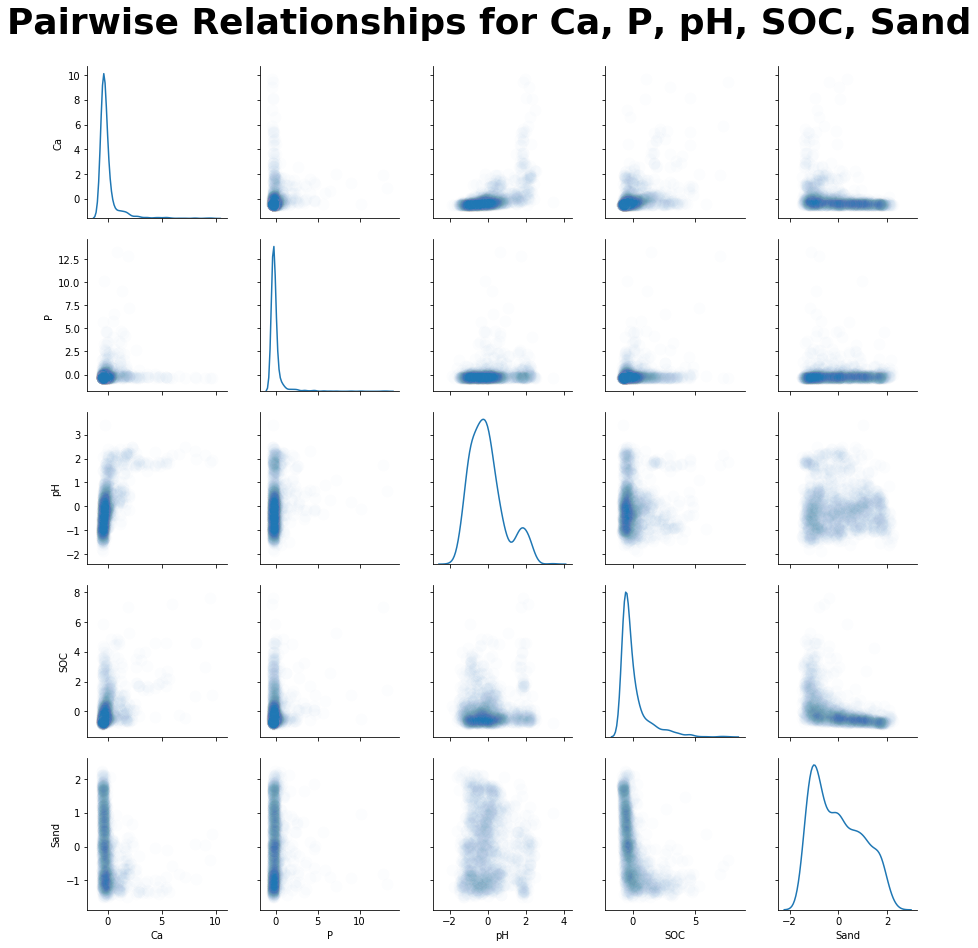

In [13]:
sns.pairplot(data=data,
                vars=output_variables,
            plot_kws={'alpha':0.01,'s':144},
            diag_kind='kde');

plt.suptitle('Pairwise Relationships for '+ ', '.join(variables),
            fontsize=36,fontweight='bold',y=1.05
            );

#### Select and Plot a Random Spectrum

In [14]:
data_columns = [column for column in data.columns if column.startswith('m')]
wavenumbers = [float(column.lstrip('m')) for column in data_columns]

In [15]:
random_data_point = data.sample(1)
random_data_point

PIDN  m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  \
1065  88YP2Vqn  0.046079  0.038881  0.032337  0.036159   0.04766  0.052622   

      m7486.39  m7484.46  m7482.54    ...         REF7      RELI      TMAP  \
1065  0.043483  0.032243  0.029478    ...    -0.280242 -0.537887 -0.338568   

          TMFI    Depth        Ca         P        pH       SOC      Sand  
1065 -0.368859  Topsoil -0.383971 -0.324931  0.498029 -0.654708  1.711239  

[1 rows x 3600 columns]

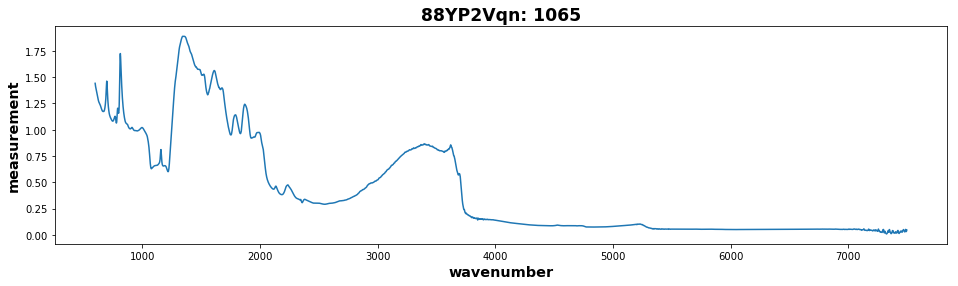

In [16]:
spectrum_as_dataframe = random_data_point[data_columns]

spectrum_as_series = spectrum_as_dataframe.iloc[0]
PIDN = random_data_point['PIDN'].iloc[0]
spectrum_array = spectrum_as_series.as_matrix()
numericID = spectrum_as_series.name

plt.figure(figsize=(16,4))
plt.plot(wavenumbers,spectrum_array); plt.title(PIDN+': '+str(numericID), 
                                    fontweight='bold',fontsize='xx-large');
plt.xlabel('wavenumber',fontweight='bold',fontsize='x-large');
plt.ylabel('measurement',fontweight='bold',fontsize='x-large');

#### Plot Average Spectrum +/- 1 SD

First we grab the descriptive stats using `.describe()`, then we use the `mean`s and `std`s to build an `errorbar` plot.

One possible alteration would be to use the median (`50%`) and quartile values (`25%` and `75%`) instead. I suspect we might get a different picture, especially of the variability.

In [18]:
all_spectra_dataframe = data[data_columns]

In [19]:
stats = all_spectra_dataframe.describe()

stats

m7497.96     m7496.04     m7494.11     m7492.18     m7490.25  \
count  1157.000000  1157.000000  1157.000000  1157.000000  1157.000000   
mean      0.245666     0.240454     0.235631     0.238994     0.248176   
std       0.114439     0.114804     0.115288     0.115075     0.114185   
min      -0.042260    -0.048559    -0.055518    -0.052353    -0.040608   
25%       0.171156     0.166020     0.161043     0.164470     0.173065   
50%       0.252899     0.247918     0.244594     0.247920     0.255784   
75%       0.315508     0.310354     0.304742     0.309540     0.317786   
max       0.730793     0.725493     0.720711     0.723293     0.731205   

          m7488.32     m7486.39     m7484.46     m7482.54     m7480.61  \
count  1157.000000  1157.000000  1157.000000  1157.000000  1157.000000   
mean      0.251674     0.243996     0.235162     0.232874     0.232518   
std       0.113603     0.113974     0.114723     0.115031     0.115021   
min      -0.034516    -0.042619    -0.053856    -0.057699    -0.058482   
25%       0.175476     0.169058     0.161094     0.159238     0.158868   
50%       0.258029     0.251061     0.243775     0.241991     0.241599   
75%       0.320834     0.314091     0.304301     0.303235     0.302438   
max       0.733872     0.726075     0.717652     0.716443     0.716307   

          ...          m617.116     m615.188     m613.259     m611.331  \
count     ...       1157.000000  1157.000000  1157.000000  1157.000000   
mean      ...          1.621387     1.615671     1.609609     1.602812   
std       ...          0.203323     0.198371     0.193652     0.189194   
min       ...          0.927082     0.935663     0.944329     0.953882   
25%       ...          1.488950     1.486420     1.484300     1.478590   
50%       ...          1.632500     1.623430     1.615780     1.605710   
75%       ...          1.765060     1.757340     1.750270     1.741990   
max       ...          2.074840     2.069870     2.063750     2.060970   

          m609.402     m607.474     m605.545     m603.617     m601.688  \
count  1157.000000  1157.000000  1157.000000  1157.000000  1157.000000   
mean      1.595395     1.588021     1.581357     1.575661     1.570702   
std       0.185172     0.181657     0.178563     0.175859     0.173415   
min       0.964296     0.975861     0.987868     0.999643     1.012760   
25%       1.469110     1.463620     1.457130     1.455110     1.447870   
50%       1.599760     1.589820     1.577530     1.575070     1.572230   
75%       1.732700     1.722190     1.711970     1.704110     1.694240   
max       2.062620     2.058860     2.044370     2.028590     2.021880   

           m599.76  
count  1157.000000  
mean      1.566095  
std       0.171090  
min       1.023430  
25%       1.443850  
50%       1.565840  
75%       1.687500  
max       2.014480  

[8 rows x 3578 columns]

In [20]:
average_values = stats.loc['mean'].as_matrix()
sds = stats.loc['std'].as_matrix()

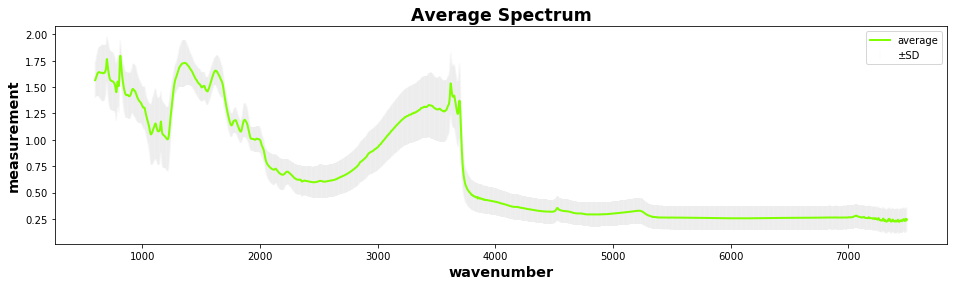

In [21]:
plt.figure(figsize=(16,4))

plt.errorbar(x=wavenumbers,y=average_values,yerr=sds,
            errorevery=1,ecolor='k',color='w',alpha=0.01,zorder=1,
            label='±SD');

plt.plot(wavenumbers,average_values,color='chartreuse',
         linewidth=2,zorder=1,label='average'
        );

plt.legend()
plt.title('Average Spectrum', fontweight='bold',fontsize='xx-large');

plt.xlabel('wavenumber',fontweight='bold',fontsize='x-large');
plt.ylabel('measurement',fontweight='bold',fontsize='x-large');

#### SNR by Wavenumber

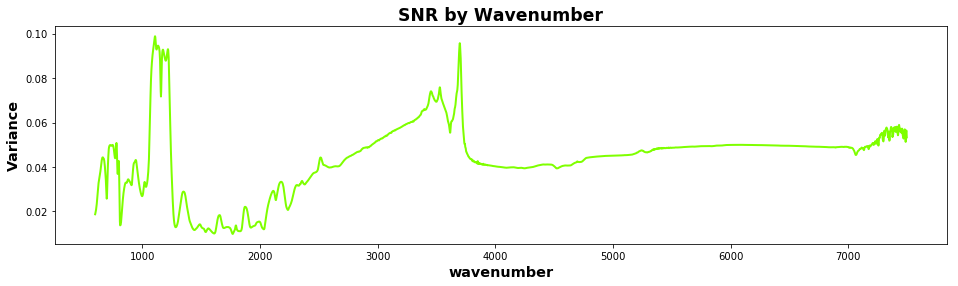

In [24]:
plt.figure(figsize=(16,4))

plt.plot(wavenumbers,
         #np.square(sds),
         np.divide(np.square(sds),
                            average_values),
         color='chartreuse',
         linewidth=2,zorder=1,
        );

plt.title('SNR by Wavenumber', fontweight='bold',fontsize='xx-large');

plt.xlabel('wavenumber',fontweight='bold',fontsize='x-large');
plt.ylabel('Variance',fontweight='bold',fontsize='x-large');